In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [85]:
df=pd.read_csv("LT_Finance - Linear regression .csv")

In [87]:
df.head()

,Date,Open Price,High Price,Low Price,Close Price,WAP,No.of Shares,No. of Trades,Total Turnover (Rs.),Deliverable Quantity,% Deli. Qty to Traded Qty,Spread High-Low,Spread Close-Open
0,4-February-2020,111.5,114.55,111.45,114.15,113.444247,507614,3232,57585888.0,153199.0,30.18,3.10,2.65
1,3-February-2020,109.8,113.45,108.25,111.05,110.885149,582592,5341,64600801.0,178957.0,30.72,5.20,1.25
2,1-February-2020,118.6,118.60,108.20,109.80,114.901732,1444455,8277,165970382.0,832497.0,57.63,10.40,-8.80
3,31-January-2020,118.0,118.65,114.90,117.15,116.925833,364544,2107,42624611.0,49561.0,13.60,3.75,-0.85
4,30-January-2020,120.7,120.70,115.70,117.05,117.717349,1136917,7191,133834855.0,759176.0,66.77,5.00,-3.65


In [89]:
df.sample(5)

,Date,Open Price,High Price,Low Price,Close Price,WAP,No.of Shares,No. of Trades,Total Turnover (Rs.),Deliverable Quantity,% Deli. Qty to Traded Qty,Spread High-Low,Spread Close-Open
315,25-October-2018,114.90,122.25,111.20,116.95,117.908781,3311085,18836,390405997.0,563531.0,17.02,11.05,2.05
566,19-October-2017,207.90,207.90,203.75,205.25,206.180925,127589,1237,26306418.0,67900.0,53.22,4.15,-2.65
631,17-July-2017,151.00,151.00,147.85,149.00,149.275737,420394,3116,62754624.0,122576.0,29.16,3.15,-2.00
597,5-September-2017,197.30,206.50,195.90,204.90,201.961556,1538950,8044,310808736.0,284481.0,18.49,10.60,7.60
192,25-April-2019,139.95,140.40,136.60,137.20,138.300067,515674,2906,71317749.0,93329.0,18.10,3.80,-2.75


In [91]:
df.tail()

,Date,Open Price,High Price,Low Price,Close Price,WAP,No.of Shares,No. of Trades,Total Turnover (Rs.),Deliverable Quantity,% Deli. Qty to Traded Qty,Spread High-Low,Spread Close-Open
739,7-February-2017,104.05,105.25,102.65,103.75,104.054454,256420,1451,26681643.0,62652.0,24.43,2.60,-0.30
740,6-February-2017,104.80,105.85,104.35,104.90,105.167420,470709,2401,49503251.0,150456.0,31.96,1.50,0.10
741,3-February-2017,103.00,105.25,102.60,104.75,104.228152,687532,3361,71660190.0,207484.0,30.18,2.65,1.75
742,2-February-2017,103.00,104.30,101.00,102.45,102.609503,805406,4342,82642309.0,200456.0,24.89,3.30,-0.55
743,1-February-2017,98.00,103.65,96.90,102.85,101.313137,1130777,5497,114562565.0,311557.0,27.55,6.75,4.85


In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 744 entries, 0 to 743
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       744 non-null    object 
 1   Open Price                 744 non-null    float64
 2   High Price                 744 non-null    float64
 3   Low Price                  744 non-null    float64
 4   Close Price                744 non-null    float64
 5   WAP                        744 non-null    float64
 6   No.of Shares               744 non-null    int64  
 7   No. of Trades              744 non-null    int64  
 8   Total Turnover (Rs.)       744 non-null    float64
 9   Deliverable Quantity       743 non-null    float64
 10  % Deli. Qty to Traded Qty  743 non-null    float64
 11  Spread High-Low            744 non-null    float64
 12  Spread Close-Open          744 non-null    float64
dtypes: float64(10), int64(2), object(1)
memory usage: 

In [95]:
df.describe()

,Open Price,High Price,Low Price,Close Price,WAP,No.of Shares,No. of Trades,Total Turnover (Rs.),Deliverable Quantity,% Deli. Qty to Traded Qty,Spread High-Low,Spread Close-Open
count,744.000000,744.000000,744.000000,744.000000,744.000000,7.440000e+02,744.000000,7.440000e+02,7.430000e+02,743.000000,744.000000,744.000000
mean,143.307661,145.615927,140.714516,143.005175,143.180103,7.526360e+05,3924.528226,1.053296e+08,2.041221e+05,26.901992,4.901411,-0.302487
std,30.167874,30.490160,29.968777,30.166167,30.229996,7.593135e+05,2870.452860,1.179880e+08,3.809271e+05,11.657141,2.598925,3.247310
min,79.700000,82.100000,78.600000,80.200000,80.284178,9.586600e+04,900.000000,8.593931e+06,2.823400e+04,1.680000,1.250000,-16.250000
25%,120.875000,122.775000,118.912500,120.700000,120.800636,3.696748e+05,2200.000000,5.173813e+07,9.152400e+04,19.340000,3.200000,-2.050000
50%,141.450000,143.800000,138.275000,140.850000,140.934889,5.576380e+05,3040.000000,7.777949e+07,1.311990e+05,25.310000,4.300000,-0.375000
75%,168.000000,170.350000,165.012500,167.712500,167.867431,8.742610e+05,4661.500000,1.172144e+08,1.995155e+05,32.130000,5.950000,1.662500
max,212.500000,213.600000,208.600000,211.100000,211.239578,1.234311e+07,31813.000000,2.242871e+09,5.713213e+06,94.120000,29.250000,12.750000


In [97]:
df.isnull().sum()

Date                         0
Open Price                   0
High Price                   0
Low Price                    0
Close Price                  0
WAP                          0
No.of Shares                 0
No. of Trades                0
Total Turnover (Rs.)         0
Deliverable Quantity         1
% Deli. Qty to Traded Qty    1
Spread High-Low              0
Spread Close-Open            0
dtype: int64

In [99]:
df.dropna(inplace=True)

In [101]:
df.isnull().sum()

Date                         0
Open Price                   0
High Price                   0
Low Price                    0
Close Price                  0
WAP                          0
No.of Shares                 0
No. of Trades                0
Total Turnover (Rs.)         0
Deliverable Quantity         0
% Deli. Qty to Traded Qty    0
Spread High-Low              0
Spread Close-Open            0
dtype: int64

In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 743 entries, 0 to 743
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       743 non-null    object 
 1   Open Price                 743 non-null    float64
 2   High Price                 743 non-null    float64
 3   Low Price                  743 non-null    float64
 4   Close Price                743 non-null    float64
 5   WAP                        743 non-null    float64
 6   No.of Shares               743 non-null    int64  
 7   No. of Trades              743 non-null    int64  
 8   Total Turnover (Rs.)       743 non-null    float64
 9   Deliverable Quantity       743 non-null    float64
 10  % Deli. Qty to Traded Qty  743 non-null    float64
 11  Spread High-Low            743 non-null    float64
 12  Spread Close-Open          743 non-null    float64
dtypes: float64(10), int64(2), object(1)
memory usage: 81.3+

<Axes: xlabel='Open Price', ylabel='No. of Trades'>

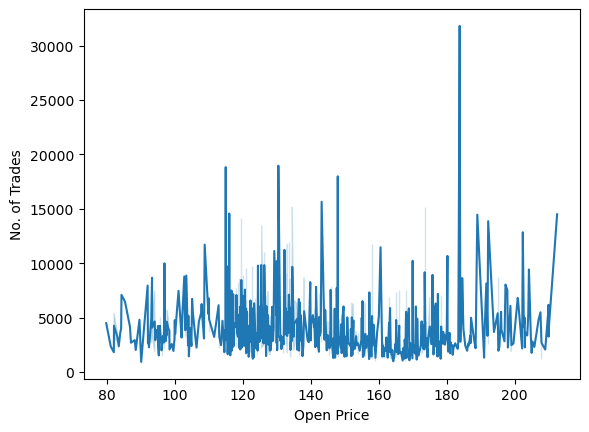

In [105]:
sns.lineplot(x=df['Open Price'],y=df['No. of Trades'])

<Axes: xlabel='Close Price', ylabel='No.of Shares'>

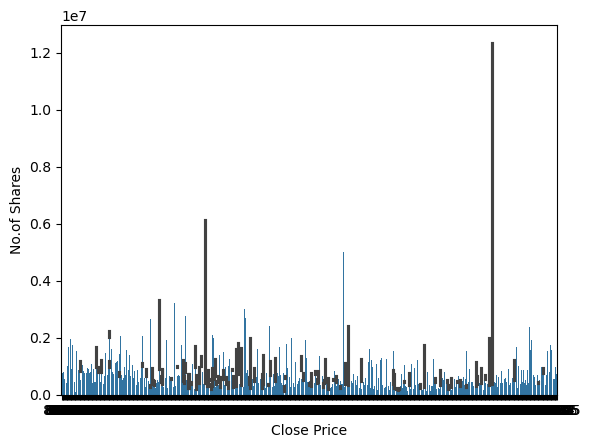

In [106]:
sns.barplot(x=df['Close Price'],y=df['No.of Shares'])

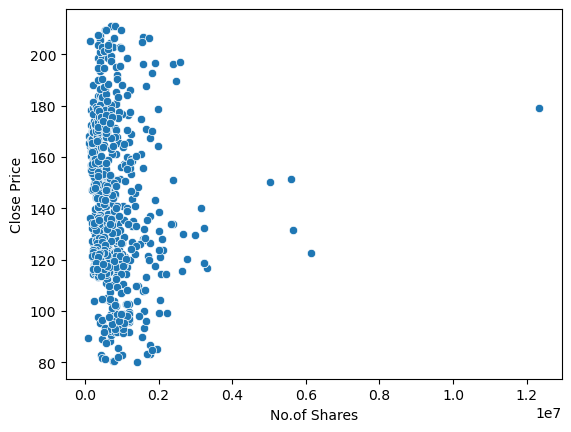

In [107]:
sns.scatterplot(x=df['No.of Shares'],y=df['Close Price']);

In [108]:
df['Date']=pd.to_datetime(df['Date'],infer_datetime_format=True)

C:\Users\JESMA\AppData\Local\Temp\ipykernel_10968\2169980441.py:1: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df['Date']=pd.to_datetime(df['Date'],infer_datetime_format=True)


In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 743 entries, 0 to 743
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       743 non-null    datetime64[ns]
 1   Open Price                 743 non-null    float64       
 2   High Price                 743 non-null    float64       
 3   Low Price                  743 non-null    float64       
 4   Close Price                743 non-null    float64       
 5   WAP                        743 non-null    float64       
 6   No.of Shares               743 non-null    int64         
 7   No. of Trades              743 non-null    int64         
 8   Total Turnover (Rs.)       743 non-null    float64       
 9   Deliverable Quantity       743 non-null    float64       
 10  % Deli. Qty to Traded Qty  743 non-null    float64       
 11  Spread High-Low            743 non-null    float64       
 12  Spread Close-

In [111]:
df['date']=df['Date'].dt.day
df['month']=df['Date'].dt.month
df['year']=df['Date'].dt.year

In [112]:
df.head()

,Date,Open Price,High Price,Low Price,Close Price,WAP,No.of Shares,No. of Trades,Total Turnover (Rs.),Deliverable Quantity,% Deli. Qty to Traded Qty,Spread High-Low,Spread Close-Open,date,month,year
0,2020-02-04,111.5,114.55,111.45,114.15,113.444247,507614,3232,57585888.0,153199.0,30.18,3.10,2.65,4,2,2020
1,2020-02-03,109.8,113.45,108.25,111.05,110.885149,582592,5341,64600801.0,178957.0,30.72,5.20,1.25,3,2,2020
2,2020-02-01,118.6,118.60,108.20,109.80,114.901732,1444455,8277,165970382.0,832497.0,57.63,10.40,-8.80,1,2,2020
3,2020-01-31,118.0,118.65,114.90,117.15,116.925833,364544,2107,42624611.0,49561.0,13.60,3.75,-0.85,31,1,2020
4,2020-01-30,120.7,120.70,115.70,117.05,117.717349,1136917,7191,133834855.0,759176.0,66.77,5.00,-3.65,30,1,2020


In [113]:
df.drop('Date',axis=1,inplace=True)

In [114]:
df.head()

,Open Price,High Price,Low Price,Close Price,WAP,No.of Shares,No. of Trades,Total Turnover (Rs.),Deliverable Quantity,% Deli. Qty to Traded Qty,Spread High-Low,Spread Close-Open,date,month,year
0,111.5,114.55,111.45,114.15,113.444247,507614,3232,57585888.0,153199.0,30.18,3.10,2.65,4,2,2020
1,109.8,113.45,108.25,111.05,110.885149,582592,5341,64600801.0,178957.0,30.72,5.20,1.25,3,2,2020
2,118.6,118.60,108.20,109.80,114.901732,1444455,8277,165970382.0,832497.0,57.63,10.40,-8.80,1,2,2020
3,118.0,118.65,114.90,117.15,116.925833,364544,2107,42624611.0,49561.0,13.60,3.75,-0.85,31,1,2020
4,120.7,120.70,115.70,117.05,117.717349,1136917,7191,133834855.0,759176.0,66.77,5.00,-3.65,30,1,2020


In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 743 entries, 0 to 743
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Open Price                 743 non-null    float64
 1   High Price                 743 non-null    float64
 2   Low Price                  743 non-null    float64
 3   Close Price                743 non-null    float64
 4   WAP                        743 non-null    float64
 5   No.of Shares               743 non-null    int64  
 6   No. of Trades              743 non-null    int64  
 7   Total Turnover (Rs.)       743 non-null    float64
 8   Deliverable Quantity       743 non-null    float64
 9   % Deli. Qty to Traded Qty  743 non-null    float64
 10  Spread High-Low            743 non-null    float64
 11  Spread Close-Open          743 non-null    float64
 12  date                       743 non-null    int32  
 13  month                      743 non-null    int32  
 14 

In [125]:
X=df.drop('Close Price',axis=1)
y=df['Close Price']

In [127]:
from sklearn.model_selection import train_test_split

In [129]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [131]:
X_train

,Open Price,High Price,Low Price,WAP,No.of Shares,No. of Trades,Total Turnover (Rs.),Deliverable Quantity,% Deli. Qty to Traded Qty,Spread High-Low,Spread Close-Open,date,month,year
384,155.05,158.75,152.30,155.916285,451243,2585,70356132.0,112968.0,25.03,6.45,-2.00,12,7,2018
592,204.00,205.40,201.40,203.002741,939918,5268,190805930.0,385414.0,41.01,4.00,-1.15,12,9,2017
427,179.00,181.50,178.10,179.405499,256040,2598,45934984.0,102000.0,39.84,3.40,-0.15,14,5,2018
441,164.90,166.75,163.80,165.419855,263515,2594,43590613.0,109059.0,41.39,2.95,0.75,23,4,2018
323,132.00,136.30,130.85,134.001230,1274440,6504,170776528.0,176370.0,13.84,5.45,1.20,12,10,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3,118.00,118.65,114.90,116.925833,364544,2107,42624611.0,49561.0,13.60,3.75,-0.85,31,1,2020
284,132.00,138.70,131.25,136.022754,634564,3076,86315143.0,53942.0,8.50,7.45,5.70,11,12,2018
87,93.20,93.80,83.85,86.916348,1833508,8669,159361820.0,505607.0,27.58,9.95,-8.45,30,9,2019
245,128.00,129.85,125.05,127.500378,615727,2987,78505425.0,106789.0,17.34,4.80,-1.55,5,2,2019


In [133]:
y_train

384    153.05
592    202.85
427    178.85
441    165.65
323    133.20
        ...  
3      117.15
284    137.70
87      84.75
245    126.45
125     96.20
Name: Close Price, Length: 594, dtype: float64

In [135]:
from sklearn.linear_model import LinearRegression

In [137]:
lr=LinearRegression()

In [139]:
lr.fit(X_train,y_train)

LinearRegression()

In [141]:
y_pred=lr.predict(X_test)

In [143]:
lr.score(X_test,y_test)

1.0

In [145]:
from sklearn.metrics import r2_score,mean_squared_error

In [147]:
r2s=r2_score(y_test,y_pred)

In [149]:
r2s

1.0

In [151]:
mse=mean_squared_error(y_test,y_pred)

In [153]:
mse

9.810354691729573e-26